# FaceStory - Enhanced 4-Step Comic Style Transformation

**<i>Written by jesamkim@ , kichul@</i>**

**This content is based on AWS Summit Seoul 2025 Expo : ComicAI Studio - Face Story** 

## Enhanced 4-Step Process
1. **Generate Korean Face Realistic Image** - Create high-quality realistic image with Nova Canvas (Originally took a photo of the user's face)
2. **Analyze Face Features** - Extract facial characteristics using Claude 3.5 Sonnet (gender, hairstyle, accessories, etc.)
3. **Generate Manga Style B&W** - Create flat-style black & white manga based on analyzed features
4. **Add Color Expression** - Apply colors based on B&W manga foundation

## Nova Canvas Best Practices Applied
- **Image Caption Style Prompts**: Written as image descriptions, not commands
- **Specific Elements Included**: Subject, Action, Environment, Lighting, Style, Camera Position
- **1024 Character Limit**: Important content placed at the beginning
- **No Negation Words**: Use negativeText parameter instead
- **Seed Value Management**: Consistent reproducible results

## Before You Start

1. **AWS Credentials Setup**: Configure AWS credentials using `aws configure` command
2. **Bedrock Model Access**: Request and get approval for Amazon Nova Canvas model access in AWS Console > Amazon Bedrock > Model access
3. **Region**:
   - Nova Canvas is working in `us-east-1` region in this code.
   - Claude 3.5 Sonnet v2 is working in `us-west-2` region in this code.

In [1]:
# Install Required Packages
# Uncomment and run the following if this is your first time running this notebook!

import sys
import subprocess

def install_packages():
    """Automatically install required packages"""
    packages = [
        'boto3>=1.34.0',
        'botocore>=1.34.0', 
        'Pillow>=9.0.0',
        'matplotlib>=3.5.0',
        'numpy>=1.21.0'
    ]
    
    print("📦 Installing required packages...")
    for package in packages:
        try:
            subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])
            print(f"✅ {package} installed successfully")
        except subprocess.CalledProcessError as e:
            print(f"❌ Failed to install {package}: {e}")
    
    print("\n🎉 Package installation complete! Run the next cell.")

# Uncomment the line below if you need to install packages
# install_packages()

print("💡 Uncomment the installation code above if you need to install packages!")
print("💡 AWS credentials and Bedrock model access are also required.")

💡 Uncomment the installation code above if you need to install packages!
💡 AWS credentials and Bedrock model access are also required.


In [2]:
# Environment Setup and Library Imports
import boto3
import json
import base64
import io
import random
import time
from datetime import datetime
from botocore.config import Config
from botocore.exceptions import ClientError
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# AWS Configuration
BEDROCK_REGION = "us-east-1"
CROSS_REGION = "us-west-2"  # For Claude 3.5 Sonnet v2 Cross-Region Inference

bedrock_runtime = boto3.client(
    'bedrock-runtime', 
    region_name=BEDROCK_REGION,
    config=Config(read_timeout=300)
)

# Cross-region client for Claude 3.5 Sonnet v2
bedrock_cross_region = boto3.client(
    'bedrock-runtime',
    region_name=CROSS_REGION,
    config=Config(read_timeout=300)
)

print("✅ Environment setup complete!")
print(f"📍 Using region: {BEDROCK_REGION} (Nova Canvas)")
print(f"📍 Using region: {CROSS_REGION} (Claude 3.5 Sonnet v2 Cross-Region)")
print("🎨 Ready for enhanced 4-step comic transformation process!")

✅ Environment setup complete!
📍 Using region: us-east-1 (Nova Canvas)
📍 Using region: us-west-2 (Claude 3.5 Sonnet v2 Cross-Region)
🎨 Ready for enhanced 4-step comic transformation process!


## Step 1: Generate Young Korean Face Realistic Image

High-quality realistic image generation applying Nova Canvas Best Practices:
- **Image Caption Style**: Written as image descriptions, not commands
- **Specific Elements**: Subject, Environment, Lighting, Style, Camera Position included
- **No Negation Words**: Use negativeText parameter for exclusions

🚀 Starting Step 1: Face image Generation
🎨 Step 1: Generating Face realistic image...
📝 Prompt length: 502 characters (limit: 1024)
✅ Step 1 Complete: Face realistic image generated!


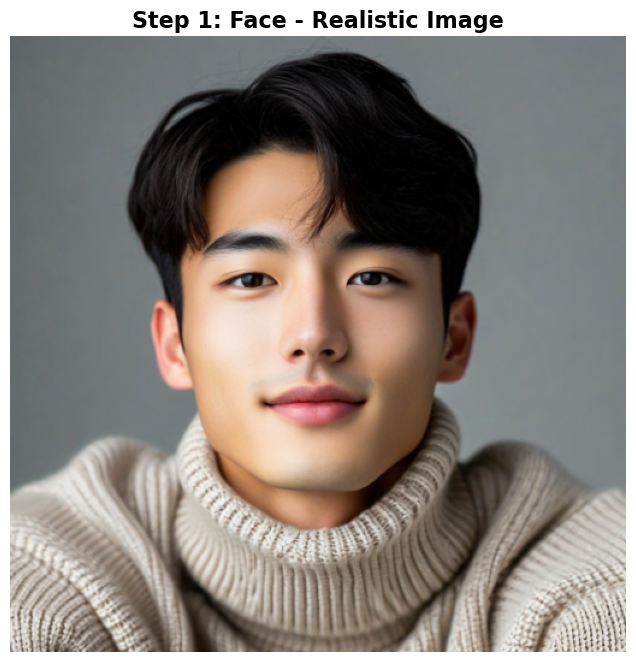

💾 Step 1 saved: step1_young_korean_realistic_20250715_023703.png


In [3]:
# Step 1: Face Realistic Image Generation
def generate_young_korean_face():
    """Generate young Korean face realistic image using Nova Canvas best practices"""
    
    # Nova Canvas Best Practice: Image caption style prompt with specific elements
    # Subject + Environment + Lighting + Style + Camera Position (under 1024 chars)
    realistic_face_prompt = """
Professional headshot portrait of a young Korean person in their early twenties, 
clean natural facial features, gentle expression with slight smile, 
wearing a cozy winter turtleneck sweater in neutral color, 
sitting in modern studio setting with neutral gray background, 
soft natural lighting from front with subtle rim lighting, 
high-resolution digital photography style, 
shot with 85mm lens at eye level, shallow depth of field, 
crisp focus on face, professional commercial photography quality
    """.strip()
    
    # Nova Canvas Best Practice: Use negativeText instead of negation words in prompt
    negative_prompt = """
blurry, low resolution, bad quality, distorted features, multiple faces, 
cartoon, anime, illustration, painting, sketch, artificial lighting, 
harsh shadows, overexposed, underexposed, noise, grain, 
old person, elderly, wrinkles, facial hair, glasses, accessories
    """.strip()
    
    # Generate with consistent seed for reproducibility
    seed = 12345  # Fixed seed for consistent results
    
    request_body = {
        "taskType": "TEXT_IMAGE",
        "textToImageParams": {
            "text": realistic_face_prompt,
            "negativeText": negative_prompt
        },
        "imageGenerationConfig": {
            "numberOfImages": 1,
            "height": 512,
            "width": 512,
            "cfgScale": 7.0,  # Balanced guidance scale
            "seed": seed,
            "quality": "standard"
        }
    }
    
    try:
        print("🎨 Step 1: Generating Face realistic image...")
        print(f"📝 Prompt length: {len(realistic_face_prompt)} characters (limit: 1024)")
        
        response = bedrock_runtime.invoke_model(
            modelId="amazon.nova-canvas-v1:0",
            body=json.dumps(request_body),
            accept="application/json",
            contentType="application/json"
        )
        
        response_body = json.loads(response['body'].read())
        
        if 'images' in response_body and response_body['images']:
            base64_image = response_body['images'][0]
            image_data = base64.b64decode(base64_image)
            
            print("✅ Step 1 Complete: Face realistic image generated!")
            return image_data, base64_image
        else:
            print("❌ Step 1 Failed: Image generation failed")
            return None, None
            
    except Exception as e:
        print(f"❌ Step 1 Error: {str(e)}")
        return None, None

# Execute Step 1
print("🚀 Starting Step 1: Face image Generation")
step1_image_data, step1_image_b64 = generate_young_korean_face()

if step1_image_data:
    step1_image = Image.open(io.BytesIO(step1_image_data))
    plt.figure(figsize=(8, 8))
    plt.imshow(step1_image)
    plt.title("Step 1: Face - Realistic Image", fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.show()
    
    # Save Step 1 result
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    step1_filename = f"step1_young_korean_realistic_{timestamp}.png"
    step1_image.save(step1_filename)
    print(f"💾 Step 1 saved: {step1_filename}")
else:
    print("❌ Step 1 failed - cannot proceed to next steps")

## Step 2: Analyze Face Features with Claude 3.5 Sonnet v2

Extract detailed facial characteristics using Claude 3.5 Sonnet v2 Cross-Region Inference:
- **Feature Analysis**: Gender, age, hairstyle, facial expression, accessories
- **Cross-Region Inference**: Use Claude 3.5 Sonnet v2 for accurate face analysis
- **Structured Output**: Generate detailed description for manga creation

In [4]:
# Step 2: Analyze Face Features using Claude 3.5 Sonnet v2
def analyze_face_features(input_image_b64):
    """Analyze facial features using Claude 3.5 Sonnet v2"""
    
    analysis_prompt = """
Analyze this face image and provide detailed characteristics in the following format:

Gender: [male/female]
Age Range: [teens/twenties/thirties]
Hair Style: [short/medium/long, straight/wavy/curly, color if visible]
Facial Expression: [neutral/smiling/serious/etc.]
Eye Shape: [round/almond/narrow/wide]
Face Shape: [oval/round/square/heart]
Accessories: [glasses/earrings/none/etc.]
Clothing: [type and style visible]
Overall Impression: [brief description]

Provide specific details that would help create an accurate Japanese manga-style illustration.
    """.strip()
    
    request_body = {
        "messages": [
            {
                "role": "user",
                "content": [
                    {
                        "type": "image",
                        "source": {
                            "type": "base64",
                            "media_type": "image/png",
                            "data": input_image_b64
                        }
                    },
                    {
                        "type": "text",
                        "text": analysis_prompt
                    }
                ]
            }
        ],
        "max_tokens": 1000,
        "temperature": 0.1,
        "anthropic_version": "bedrock-2023-05-31"
    }
    
    try:
        print("🔍 Step 2: Analyzing face features with Claude 3.5 Sonnet v2...")
        
        response = bedrock_cross_region.invoke_model(
            modelId="us.anthropic.claude-3-5-sonnet-20241022-v2:0",  # Claude 3.5 Sonnet v2 Cross-Region
            body=json.dumps(request_body),
            accept="application/json",
            contentType="application/json"
        )
        
        response_body = json.loads(response['body'].read())
        analysis_result = response_body['content'][0]['text']
        
        print("✅ Step 2 Complete: Face features analyzed!")
        print(f"📋 Analysis Result:\n{analysis_result}")
        return analysis_result
        
    except Exception as e:
        print(f"❌ Step 2 Error: {str(e)}")
        return None

# Execute Step 2 (only if Step 1 succeeded)
if 'step1_image_b64' in locals() and step1_image_b64:
    print("\n🚀 Starting Step 2: Face Feature Analysis")
    face_analysis = analyze_face_features(step1_image_b64)
else:
    print("❌ Step 1 failed - skipping Step 2")


🚀 Starting Step 2: Face Feature Analysis
🔍 Step 2: Analyzing face features with Claude 3.5 Sonnet v2...
✅ Step 2 Complete: Face features analyzed!
📋 Analysis Result:
Here's a detailed analysis for manga-style reference:

Gender: Male
Age Range: Early to mid-twenties
Hair Style: Medium length, black, slightly wavy with side-swept bangs and layered cut
Facial Expression: Gentle, subtle smile showing warmth
Eye Shape: Almond-shaped with distinctive Asian features, expressive
Face Shape: Oval with a defined jawline and smooth contours
Accessories: None visible
Clothing: Cream/beige chunky knit turtleneck sweater with ribbed texture
Overall Impression: The subject has a gentle, approachable appearance with youthful features. The soft lighting and neutral background enhance the warmth of the portrait.

For manga-style illustration notes:
- Emphasize the gentle curve of the eyes and subtle smile
- Pay attention to the soft, layered hair texture falling naturally
- The sweater adds cozy, casu

## Step 3: Generate Manga Style B&W

Create flat-style manga based on analyzed features:
- **Feature-Based Generation**: Use analysis results to create accurate manga
- **Manga Style**: Flat colors, clean lines, simplified features
- **No 3D Shading**: Pure black and white without gradients


🚀 Starting Step 3: Manga Style B&W Generation
🎨 Step 3: Generating manga style B&W...
📝 Prompt length: 895 characters (limit: 1024)
✅ Step 3 Complete: manga style B&W generated!


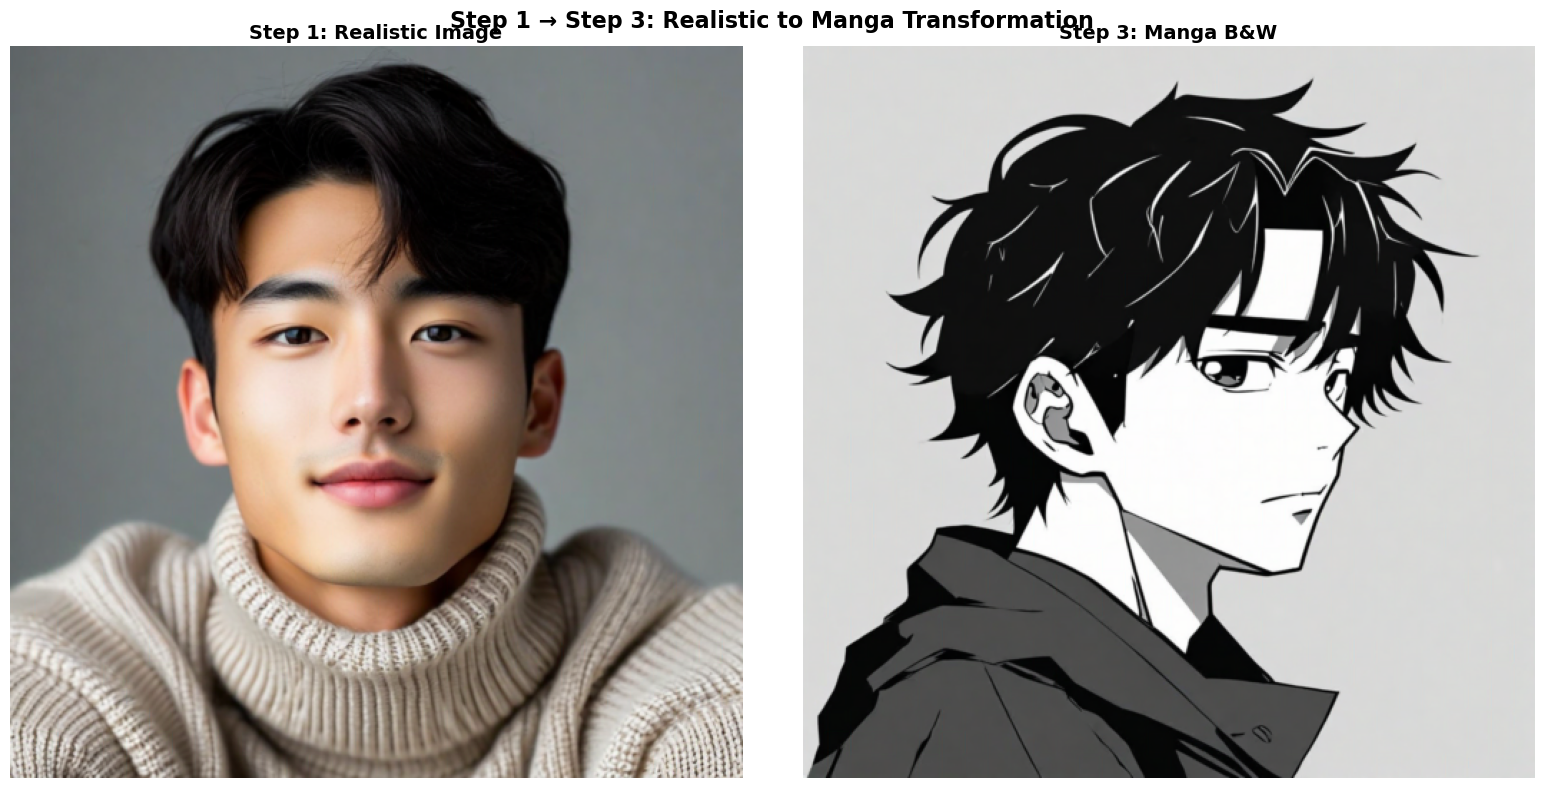

💾 Step 3 saved: step3_manga_bw_20250715_023703.png


In [5]:
# Step 3: Generate Manga Style B&W based on face analysis
def generate_manga_style_bw(face_analysis):
    """Generate manga style B&W image based on face analysis"""
    
    if not face_analysis:
        print("❌ No face analysis available")
        return None, None
    
    # Create manga prompt based on analysis
    manga_prompt = f"""
Japanese manga style black and white illustration portrait,
clean flat art style with no 3D shading or gradients,
pure black and white colors only, no gray tones,
bold black outlines with consistent line weight,
simplified cartoon facial features,
large expressive manga-style eyes,
flat geometric shapes for face structure,
minimal detail with clean vector-like appearance,
traditional Japanese manga art style,
cel-shading technique with solid color blocks,
based on these characteristics: {face_analysis[:400]}...
    """.strip()
    
    negative_prompt = """
realistic photo, 3D rendering, gradient shading, soft shadows,
detailed skin texture, photographic lighting, grayscale,
gray tones, realistic proportions, detailed hair texture,
complex shading, airbrush effect, realistic eyes,
watercolor, oil painting, sketch, rough drawing
    """.strip()
    
    seed = 23456
    
    request_body = {
        "taskType": "TEXT_IMAGE",
        "textToImageParams": {
            "text": manga_prompt,
            "negativeText": negative_prompt
        },
        "imageGenerationConfig": {
            "numberOfImages": 1,
            "height": 512,
            "width": 512,
            "cfgScale": 8.0,  # Higher guidance for stronger style
            "seed": seed
        }
    }
    
    try:
        print("🎨 Step 3: Generating manga style B&W...")
        print(f"📝 Prompt length: {len(manga_prompt)} characters (limit: 1024)")
        
        response = bedrock_runtime.invoke_model(
            modelId="amazon.nova-canvas-v1:0",
            body=json.dumps(request_body),
            accept="application/json",
            contentType="application/json"
        )
        
        response_body = json.loads(response['body'].read())
        
        if 'images' in response_body and response_body['images']:
            base64_image = response_body['images'][0]
            image_data = base64.b64decode(base64_image)
            
            print("✅ Step 3 Complete: manga style B&W generated!")
            return image_data, base64_image
        else:
            print("❌ Step 3 Failed: Manga generation failed")
            return None, None
            
    except Exception as e:
        print(f"❌ Step 3 Error: {str(e)}")
        return None, None

# Execute Step 3 (only if Step 2 succeeded)
if 'face_analysis' in locals() and face_analysis:
    print("\n🚀 Starting Step 3: Manga Style B&W Generation")
    step3_image_data, step3_image_b64 = generate_manga_style_bw(face_analysis)
    
    if step3_image_data:
        step3_image = Image.open(io.BytesIO(step3_image_data))
        
        # Display Step 1 and Step 3 comparison
        fig, axes = plt.subplots(1, 2, figsize=(16, 8))
        
        axes[0].imshow(step1_image)
        axes[0].set_title("Step 1: Realistic Image", fontsize=14, fontweight='bold')
        axes[0].axis('off')
        
        axes[1].imshow(step3_image)
        axes[1].set_title("Step 3: Manga B&W", fontsize=14, fontweight='bold')
        axes[1].axis('off')
        
        plt.suptitle("Step 1 → Step 3: Realistic to Manga Transformation", 
                    fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        # Save Step 3 result
        step3_filename = f"step3_manga_bw_{timestamp}.png"
        step3_image.save(step3_filename)
        print(f"💾 Step 3 saved: {step3_filename}")
    else:
        print("❌ Step 3 failed - cannot proceed to Step 4")
else:
    print("❌ Step 2 failed - skipping Step 3")

## Step 4: Add Color Expression

Add colors based on manga B&W style:
- **Conditional Colorization**: Add colors based on Step 3 B&W manga
- **Manga Coloring**: Clean flat colors with cel-shading
- **Multiple Color Styles**: Vibrant, warm, and cool color palettes


🚀 Starting Step 4: Color Expression Addition

🎨 Generating vibrant color style...
🎨 Step 4: Adding Vibrant Manga color expression...
📝 Prompt length: 448 characters (limit: 1024)
✅ Step 4 Complete: Vibrant Manga color expression added!
💾 Step 4 Vibrant Manga saved: step4_colored_vibrant_20250715_023703.png

🎨 Generating warm color style...
🎨 Step 4: Adding Warm Manga color expression...
📝 Prompt length: 384 characters (limit: 1024)
✅ Step 4 Complete: Warm Manga color expression added!
💾 Step 4 Warm Manga saved: step4_colored_warm_20250715_023703.png

🎨 Generating cool color style...
🎨 Step 4: Adding Cool Manga color expression...
📝 Prompt length: 381 characters (limit: 1024)
✅ Step 4 Complete: Cool Manga color expression added!
💾 Step 4 Cool Manga saved: step4_colored_cool_20250715_023703.png


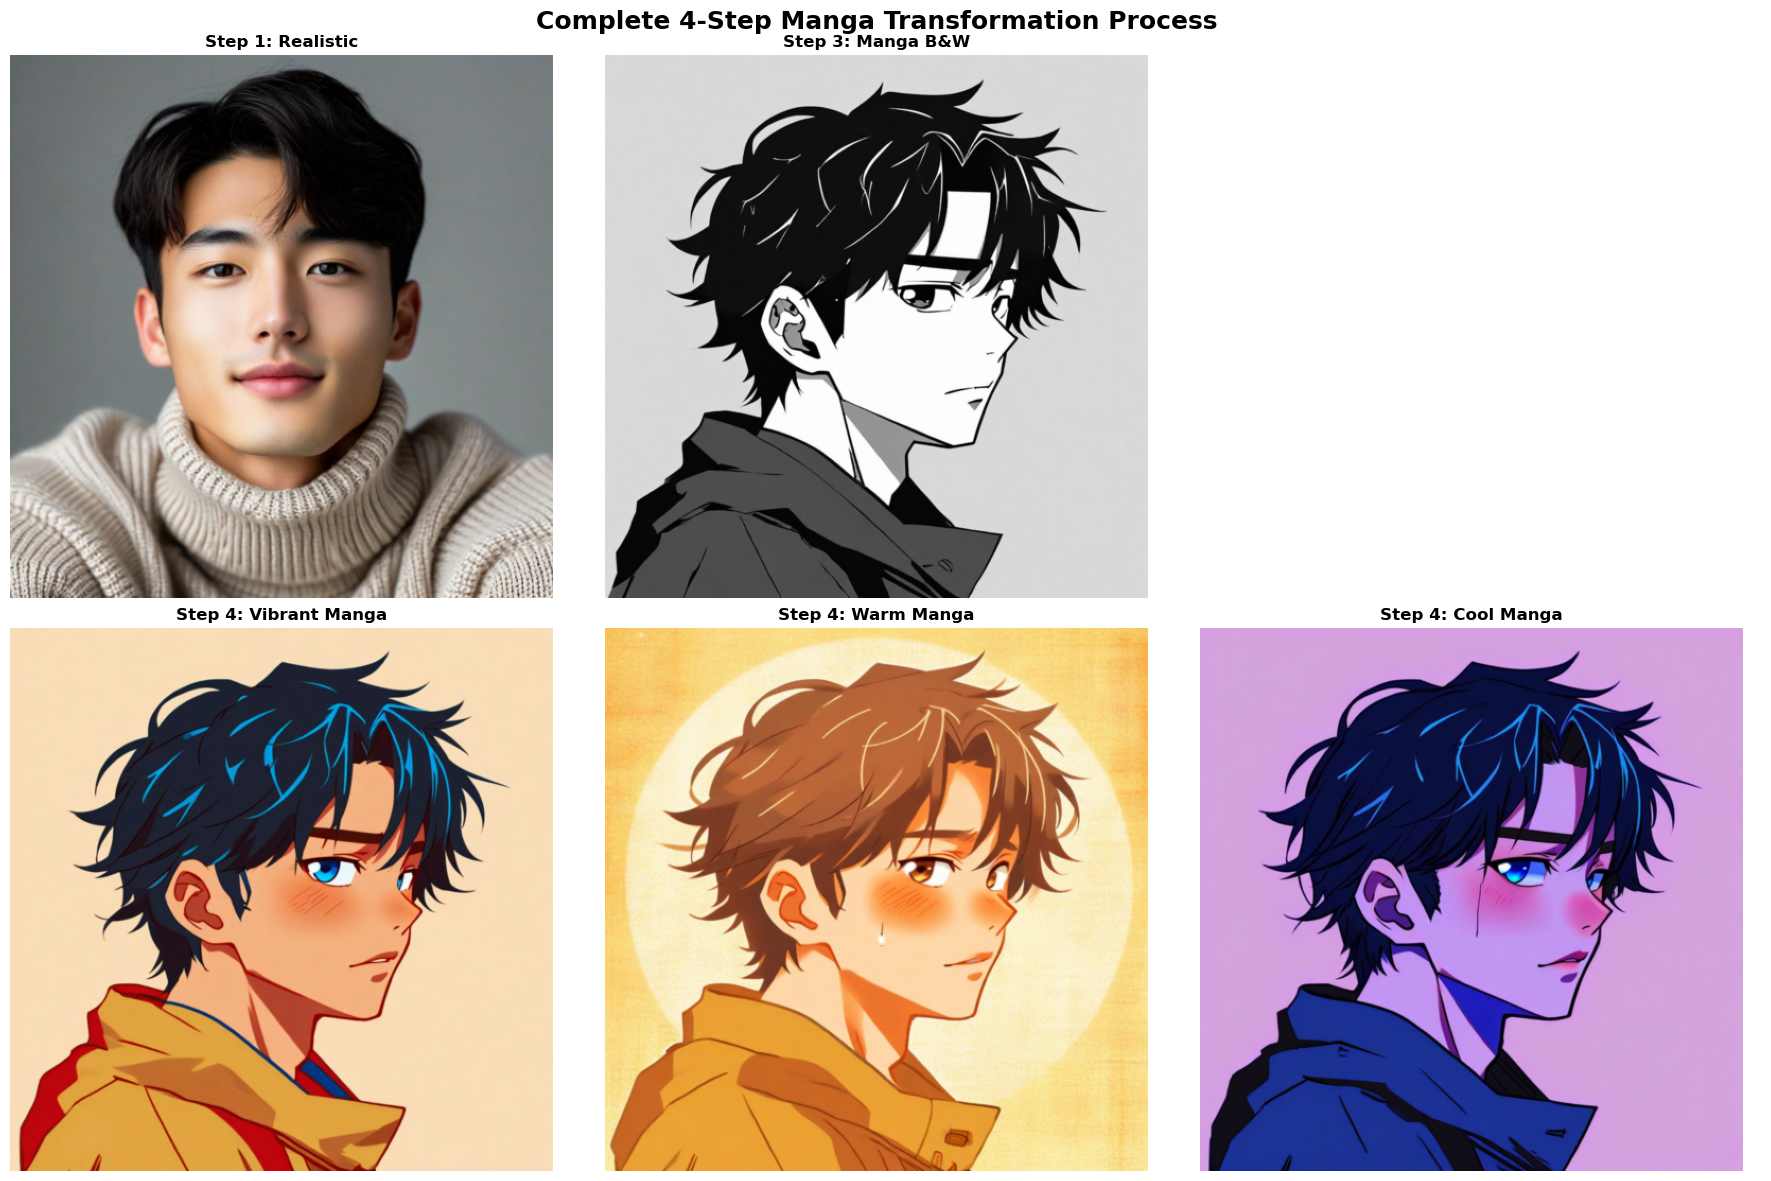


🎉 All 4 steps completed successfully!
📁 Generated 3 colored variations


In [6]:
# Step 4: Add Color Expression to B&W Manga
def add_color_to_bw_manga(bw_manga_image_b64, color_style="vibrant"):
    """Add color expression to black and white manga style image"""
    
    # Multiple color style options for manga
    color_styles = {
        "vibrant": {
            "prompt": """
Colorized Japanese manga style illustration, 
vibrant color palette with warm skin tones in peachy beige, 
rich black hair with blue-black highlights, 
bright expressive eyes in dark brown, 
clean flat color fills with cel-shading technique, 
bold primary colors: red, blue, yellow accents, 
high contrast color scheme, 
traditional manga coloring style, 
flat vector-like color application, 
maintaining strong black outlines from original drawing
            """.strip(),
            "name": "Vibrant Manga"
        },
        "warm": {
            "prompt": """
Warm-toned Japanese manga style colored illustration, 
natural warm skin tones in golden beige, 
soft brown hair with warm highlights, 
gentle brown eyes with warm reflections, 
earth tone color palette: browns, oranges, warm yellows, 
soft cel-shading with flat color blocks, 
cozy and friendly atmosphere, 
maintaining manga line art structure, 
traditional manga coloring technique
            """.strip(),
            "name": "Warm Manga"
        },
        "cool": {
            "prompt": """
Cool-toned Japanese manga style colored portrait, 
cool skin tones with subtle pink undertones, 
deep black hair with cool blue highlights, 
striking dark eyes with cool reflections, 
cool color palette: blues, purples, cool grays, 
dramatic cel-shading with flat color blocks, 
modern manga coloring style, 
maintaining bold black line art foundation, 
sophisticated color harmony
            """.strip(),
            "name": "Cool Manga"
        }
    }
    
    selected_style = color_styles.get(color_style, color_styles["vibrant"])
    color_prompt = selected_style["prompt"]
    style_name = selected_style["name"]
    
    # Negative prompt for color step
    negative_prompt = """
black and white, monochrome, grayscale, 
muddy colors, dull colors, oversaturated, 
realistic photo coloring, photographic lighting, 
soft gradients, airbrush effect, 
blurry colors, color bleeding, 
watercolor, oil painting effect, 3D shading
    """.strip()
    
    seed = 34567  # Different seed for color variation
    
    request_body = {
        "taskType": "TEXT_IMAGE",
        "textToImageParams": {
            "text": color_prompt,
            "negativeText": negative_prompt,
            "conditionImage": bw_manga_image_b64  # Use Step 3 B&W manga as condition
        },
        "imageGenerationConfig": {
            "numberOfImages": 1,
            "height": 512,
            "width": 512,
            "cfgScale": 8.0,  # Balanced guidance for color application
            "seed": seed
        }
    }
    
    try:
        print(f"🎨 Step 4: Adding {style_name} color expression...")
        print(f"📝 Prompt length: {len(color_prompt)} characters (limit: 1024)")
        
        response = bedrock_runtime.invoke_model(
            modelId="amazon.nova-canvas-v1:0",
            body=json.dumps(request_body),
            accept="application/json",
            contentType="application/json"
        )
        
        response_body = json.loads(response['body'].read())
        
        if 'images' in response_body and response_body['images']:
            base64_image = response_body['images'][0]
            image_data = base64.b64decode(base64_image)
            
            print(f"✅ Step 4 Complete: {style_name} color expression added!")
            return image_data, base64_image, style_name
        else:
            print("❌ Step 4 Failed: Color expression failed")
            return None, None, None
            
    except Exception as e:
        print(f"❌ Step 4 Error: {str(e)}")
        return None, None, None

# Execute Step 4 (only if Step 3 succeeded)
if 'step3_image_b64' in locals() and step3_image_b64:
    print("\n🚀 Starting Step 4: Color Expression Addition")
    
    # Generate all three color styles
    color_results = []
    for style in ["vibrant", "warm", "cool"]:
        print(f"\n🎨 Generating {style} color style...")
        step4_image_data, step4_image_b64, style_name = add_color_to_bw_manga(step3_image_b64, style)
        
        if step4_image_data:
            step4_image = Image.open(io.BytesIO(step4_image_data))
            color_results.append((step4_image, style_name, step4_image_data))
            
            # Save individual result
            step4_filename = f"step4_colored_{style}_{timestamp}.png"
            step4_image.save(step4_filename)
            print(f"💾 Step 4 {style_name} saved: {step4_filename}")
    
    # Display all results if any succeeded
    if color_results:
        num_results = len(color_results)
        fig, axes = plt.subplots(2, max(2, num_results), figsize=(6 * max(2, num_results), 12))
        
        # First row: Step 1 and Step 3
        axes[0, 0].imshow(step1_image)
        axes[0, 0].set_title("Step 1: Realistic", fontsize=12, fontweight='bold')
        axes[0, 0].axis('off')
        
        axes[0, 1].imshow(step3_image)
        axes[0, 1].set_title("Step 3: Manga B&W", fontsize=12, fontweight='bold')
        axes[0, 1].axis('off')
        
        # Hide unused cells in first row
        for i in range(2, max(2, num_results)):
            axes[0, i].axis('off')
        
        # Second row: Step 4 color variations
        for i, (colored_image, style_name, _) in enumerate(color_results):
            axes[1, i].imshow(colored_image)
            axes[1, i].set_title(f"Step 4: {style_name}", fontsize=12, fontweight='bold')
            axes[1, i].axis('off')
        
        # Hide unused cells in second row
        for i in range(len(color_results), max(2, num_results)):
            axes[1, i].axis('off')
        
        plt.suptitle("Complete 4-Step Manga Transformation Process", 
                    fontsize=18, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        print(f"\n🎉 All 4 steps completed successfully!")
        print(f"📁 Generated {len(color_results)} colored variations")
    else:
        print("❌ Step 4 failed for all color styles")
else:
    print("❌ Step 3 failed - skipping Step 4")

## 🎉 Enhanced 4-Step Process Complete!

### Process Summary
1. **Step 1**: Generate Face realistic image 
2. **Step 2**: Analyze face features using Claude 3.5 Sonnet v2 Cross-Region Inference
3. **Step 3**: Generate manga style B&W based on analysis
4. **Step 4**: Apply 3 different color styles to B&W manga 

### Nova Canvas Best Practices Applied

#### Prompt Optimization
- **Image Caption Style**: Written as image descriptions, not commands
- **Specific Elements Included**: Subject, Action, Environment, Lighting, Style, Camera Position
- **1024 Character Limit Compliance**: All prompts written within the limit
- **Important Information First**: Core content placed at the beginning of prompts

#### Negation Handling
- **negativeText Parameter Usage**: No negation words used in prompts
- **Clear Exclusion Specification**: Unwanted styles and features specified in negativeText

#### Conditional Image Generation
- **conditionImage Utilization**: Previous step results used as input for next steps
- **Consistent Transformation**: Connected transformation process across steps

#### Parameter Optimization
- **Appropriate CFG Scale**: Optimized guidance scale for each step
- **Seed Value Management**: Fixed seeds for reproducible results
- **Resolution Optimization**: Standard 512x512 resolution used

### Usage Tips

1. **Prompt Modification**: Modify prompts in each step to try different styles
2. **Seed Value Changes**: Use different seed values to generate variations
3. **CFG Scale Adjustment**: Adjust for stronger or weaker style application
4. **Color Style Addition**: Add new color palettes as needed

### Technical Specifications

- **Models**: Amazon Nova Canvas v1.0, Claude 3.5 Sonnet v2
- **Regions**: us-east-1 (Nova Canvas), us-west-2 (Claude 3.5 Sonnet v2 Cross-Region)
- **Image Resolution**: 512x512 pixels
- **Output Format**: PNG files
- **Processing Time**: ~30-60 seconds per step

### Enhanced Features

#### Face Analysis with Claude 3.5 Sonnet v2
- **Cross-Region Inference**: Uses Claude 3.5 Sonnet v2 for accurate facial feature analysis
- **Structured Analysis**: Gender, age, hairstyle, expression, accessories detection
- **Manga-Optimized**: Analysis tailored for manga style generation

#### Manga Style Generation
- **Flat Art Style**: No 3D shading or gradients, pure black and white
- **Clean Line Art**: Bold black outlines with consistent weight
- **Simplified Features**: Large expressive eyes, geometric face structure

### Color Style Details

1. **Vibrant Manga**: Bold primary colors with high contrast, traditional manga style
2. **Warm Manga**: Natural warm tones with browns, oranges, and warm yellows
3. **Cool Manga**: Cool blues and purples with sophisticated color harmony

This notebook demonstrates the power of Nova Canvas when combined with proper prompt engineering techniques!